In [1]:
import pandas as pd
import numpy as np
import glob
import cv2
import json
import matplotlib.pyplot as plt

In [2]:
train_jpg = glob.glob('./基于可见光图像的柑橘花果梢语义分割挑战赛公开数据-初赛/train/image/*')
train_json = glob.glob('./基于可见光图像的柑橘花果梢语义分割挑战赛公开数据-初赛/train/json/*')

train_jpg.sort()
train_json.sort()

test_jpg = glob.glob('./基于可见光图像的柑橘花果梢语义分割挑战赛公开数据-初赛/test/image/*')
test_jpg.sort()

In [3]:
test_jpg

['./基于可见光图像的柑橘花果梢语义分割挑战赛公开数据-初赛/test/image/shoot114_1.jpg',
 './基于可见光图像的柑橘花果梢语义分割挑战赛公开数据-初赛/test/image/shoot127_1.jpg',
 './基于可见光图像的柑橘花果梢语义分割挑战赛公开数据-初赛/test/image/shoot14_8.jpg',
 './基于可见光图像的柑橘花果梢语义分割挑战赛公开数据-初赛/test/image/shoot160_2.jpg',
 './基于可见光图像的柑橘花果梢语义分割挑战赛公开数据-初赛/test/image/shoot197_2.jpg',
 './基于可见光图像的柑橘花果梢语义分割挑战赛公开数据-初赛/test/image/shoot216_2.jpg',
 './基于可见光图像的柑橘花果梢语义分割挑战赛公开数据-初赛/test/image/shoot23_1.jpg',
 './基于可见光图像的柑橘花果梢语义分割挑战赛公开数据-初赛/test/image/shoot23_8.jpg',
 './基于可见光图像的柑橘花果梢语义分割挑战赛公开数据-初赛/test/image/shoot254_5.jpg',
 './基于可见光图像的柑橘花果梢语义分割挑战赛公开数据-初赛/test/image/shoot268_5.jpg',
 './基于可见光图像的柑橘花果梢语义分割挑战赛公开数据-初赛/test/image/shoot286_8.jpg',
 './基于可见光图像的柑橘花果梢语义分割挑战赛公开数据-初赛/test/image/shoot296_5.jpg',
 './基于可见光图像的柑橘花果梢语义分割挑战赛公开数据-初赛/test/image/shoot323_5.jpg',
 './基于可见光图像的柑橘花果梢语义分割挑战赛公开数据-初赛/test/image/shoot328_6.jpg',
 './基于可见光图像的柑橘花果梢语义分割挑战赛公开数据-初赛/test/image/shoot333_5.jpg',
 './基于可见光图像的柑橘花果梢语义分割挑战赛公开数据-初赛/test/image/shoot334_5.jpg',
 './基于可见光图像的柑橘花果梢语义分割挑战赛公开数据-初赛/test/image/

In [4]:
test_jpg[:10]

['./基于可见光图像的柑橘花果梢语义分割挑战赛公开数据-初赛/test/image/shoot114_1.jpg',
 './基于可见光图像的柑橘花果梢语义分割挑战赛公开数据-初赛/test/image/shoot127_1.jpg',
 './基于可见光图像的柑橘花果梢语义分割挑战赛公开数据-初赛/test/image/shoot14_8.jpg',
 './基于可见光图像的柑橘花果梢语义分割挑战赛公开数据-初赛/test/image/shoot160_2.jpg',
 './基于可见光图像的柑橘花果梢语义分割挑战赛公开数据-初赛/test/image/shoot197_2.jpg',
 './基于可见光图像的柑橘花果梢语义分割挑战赛公开数据-初赛/test/image/shoot216_2.jpg',
 './基于可见光图像的柑橘花果梢语义分割挑战赛公开数据-初赛/test/image/shoot23_1.jpg',
 './基于可见光图像的柑橘花果梢语义分割挑战赛公开数据-初赛/test/image/shoot23_8.jpg',
 './基于可见光图像的柑橘花果梢语义分割挑战赛公开数据-初赛/test/image/shoot254_5.jpg',
 './基于可见光图像的柑橘花果梢语义分割挑战赛公开数据-初赛/test/image/shoot268_5.jpg']

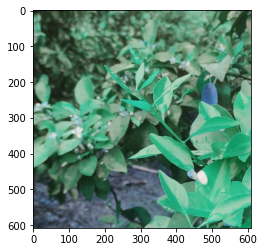

In [5]:
img = cv2.imread(train_jpg[50])
plt.imshow(img)

In [6]:
mask = np.zeros((img.shape[0], img.shape[1]))
for points in json.load(open(train_json[50]))['shapes']:
    pts = np.array(points['points']).astype(np.int32)
    pts = pts.reshape((-1,1,2))
    mask = cv2.fillPoly(mask,[pts],True, 255)


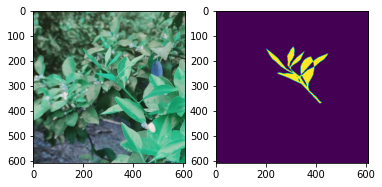

In [7]:
plt.subplot(121)
plt.imshow(img)

plt.subplot(122)
plt.imshow(mask)

In [8]:
import numpy as np
import glob
import cv2

import matplotlib.pyplot as plt

import os, sys, glob, argparse
import pandas as pd
import numpy as np
from tqdm import tqdm

import cv2
from PIL import Image
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold

import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = False
torch.backends.cudnn.benchmark = True

import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data.dataset import Dataset

In [9]:
import segmentation_models_pytorch as smp

model = smp.Unet(
    encoder_name="resnet18",        # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
    encoder_weights="imagenet",     # use `imagenet` pre-trained weights for encoder initialization
    in_channels=3,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
    classes=1,                      # model output channels (number of classes in your dataset)
)

In [10]:
class XunFeiDataset(Dataset):
    def __init__(self, img_path, json_path, transform=None):
        self.img_path = img_path
        self.json_path = json_path
        if transform is not None:
            self.transform = transform
        else:
            self.transform = None

    def __getitem__(self, index):
        img = cv2.imread(self.img_path[index])
        mask = np.zeros((img.shape[0], img.shape[1]))
        for points in json.load(open(self.json_path[index]))['shapes']:
            pts = np.array(points['points']).astype(np.int32)
            pts = pts.reshape((-1,1,2))
            mask = cv2.fillPoly(mask,[pts],True, 1)
        if self.transform is not None:
            result = self.transform(image = img, mask=mask)
            img = result['image']
            mask = result['mask']
        img = img.transpose([2,0,1])
        return img, torch.from_numpy(mask).long()

    def __len__(self):
        return len(self.img_path)

In [18]:
import albumentations as A

train_dataset = XunFeiDataset(
    train_jpg[:-20], train_json[:-20],
    A.Compose([
    A.RandomRotate90(),
    A.HorizontalFlip(p=0.5),
    A.RandomContrast(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.Blur(p=0.5),
    A.ChannelShuffle(p=0.5),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225,))
]))

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=5, shuffle=True, num_workers=1, pin_memory=False
)

val_dataset = XunFeiDataset(
    train_jpg[-20:], train_json[-20:],
    A.Compose([
    A.RandomRotate90(),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225,))
]))

val_loader = torch.utils.data.DataLoader(
    val_dataset, batch_size=5, shuffle=True, num_workers=1, pin_memory=False
)

In [19]:
model = model.to('cuda')
# criterion = nn.CrossEntropyLoss().cuda()
criterion = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(model.parameters(), 0.003)

In [20]:
def train(train_loader, model, criterion, optimizer):
    model.train()
    train_loss = 0.0
    for i, (input, target) in enumerate(train_loader):
        input = input.cuda(non_blocking=True)
        target = target.cuda(non_blocking=True)

        # compute output
        output = model(input)
        loss = criterion(output[:, 0, :, :], target.float())

        # compute gradient and do SGD step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if i % 20 == 0:
            print('Train loss', loss.item(), ((output[:, 0, :, :] > 0) * target).sum() / target.sum())
            
        train_loss += loss.item()
    
    return train_loss/len(train_loader)

def validate(val_loader, model, criterion):
    model.eval()
    
    val_loss = 0.0
    val_iou = 0
    with torch.no_grad():
        for i, (input, target) in enumerate(val_loader):
            input = input.cuda()
            target = target.cuda()

            # compute output
            output = model(input)
            loss = criterion(output[:, 0, :, :], target.float())
            val_loss += loss.item()
            
            val_iou += ((output[:, 0, :, :] > 0) * target).sum() / target.sum()
    
    output = output.data.cpu().numpy()
    target = target.data.cpu().numpy()
    
    plt.figure()
    plt.subplot(121)
    plt.imshow((output[0][0] > 0).astype(int) * 128)
    plt.xticks([]); plt.yticks([])

    plt.subplot(122)
    plt.imshow((target[0]).astype(int) * 128)
    plt.xticks([]); plt.yticks([])
    plt.show()
    
    return val_loss / len(val_loader), val_iou / len(val_loader)

Train loss 0.12737709283828735 tensor(0.3779, device='cuda:0')
Train loss 0.09867123514413834 tensor(0.1891, device='cuda:0')
Train loss 0.07894774526357651 tensor(0.4333, device='cuda:0')


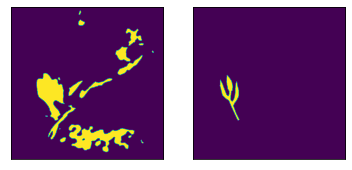

0.12137421765705435 0.24252403154969215 tensor(0.9394, device='cuda:0')
Train loss 0.16649551689624786 tensor(0.2903, device='cuda:0')
Train loss 0.08851674199104309 tensor(0.3386, device='cuda:0')
Train loss 0.06371580064296722 tensor(0.3482, device='cuda:0')


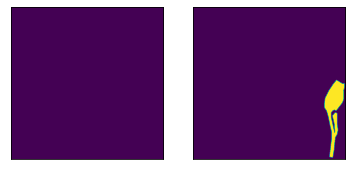

0.10032715039645754 0.09110796637833118 tensor(0.1972, device='cuda:0')
Train loss 0.07117227464914322 tensor(0.3045, device='cuda:0')
Train loss 0.07256537675857544 tensor(0.5475, device='cuda:0')
Train loss 0.11565446853637695 tensor(0.1823, device='cuda:0')


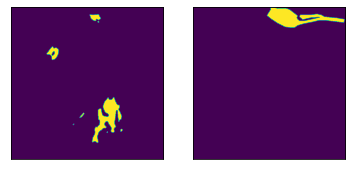

0.09722124312709017 0.11162609606981277 tensor(0.5604, device='cuda:0')
Train loss 0.09614833444356918 tensor(0.3560, device='cuda:0')
Train loss 0.13000299036502838 tensor(0.3232, device='cuda:0')
Train loss 0.11697295308113098 tensor(0.3074, device='cuda:0')


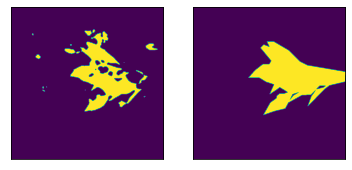

0.09505571415875017 0.09666976891458035 tensor(0.5754, device='cuda:0')
Train loss 0.0984770879149437 tensor(0.4248, device='cuda:0')
Train loss 0.1014159545302391 tensor(0.2035, device='cuda:0')
Train loss 0.09222950041294098 tensor(0.2901, device='cuda:0')


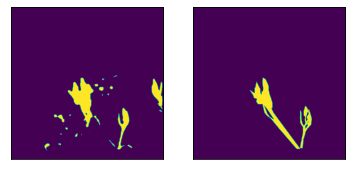

0.09529306394297903 0.10012664645910263 tensor(0.5242, device='cuda:0')
Train loss 0.0758306086063385 tensor(0.3033, device='cuda:0')
Train loss 0.10180742293596268 tensor(0.2311, device='cuda:0')
Train loss 0.105476014316082 tensor(0.4187, device='cuda:0')


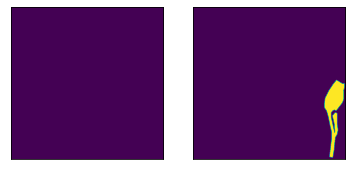

0.09471622018552409 0.09301770105957985 tensor(0.5586, device='cuda:0')
Train loss 0.0916454866528511 tensor(0.5221, device='cuda:0')
Train loss 0.0738874077796936 tensor(0.3662, device='cuda:0')
Train loss 0.09788130223751068 tensor(0.0944, device='cuda:0')


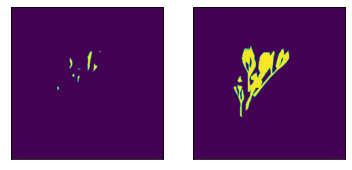

0.09112617482499379 0.09966196492314339 tensor(0.0320, device='cuda:0')
Train loss 0.14456979930400848 tensor(0.0660, device='cuda:0')
Train loss 0.08259031921625137 tensor(0.5334, device='cuda:0')
Train loss 0.062286797910928726 tensor(0.4574, device='cuda:0')


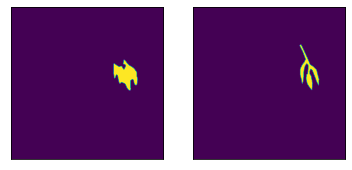

0.08848454494301866 0.0886331107467413 tensor(0.4512, device='cuda:0')
Train loss 0.08427437394857407 tensor(0.3111, device='cuda:0')
Train loss 0.10093532502651215 tensor(0.2639, device='cuda:0')
Train loss 0.058783695101737976 tensor(0.4328, device='cuda:0')


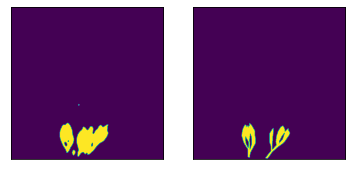

0.08838543023278074 0.08967716619372368 tensor(0.5457, device='cuda:0')
Train loss 0.05386008694767952 tensor(0.3682, device='cuda:0')
Train loss 0.09500911831855774 tensor(0.3661, device='cuda:0')
Train loss 0.10065897554159164 tensor(0.3782, device='cuda:0')


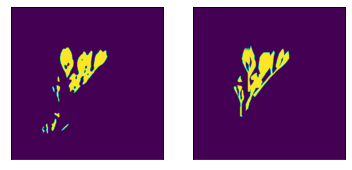

0.08524817137456522 0.11954830959439278 tensor(0.1517, device='cuda:0')
Train loss 0.06745241582393646 tensor(0.5682, device='cuda:0')
Train loss 0.06520715355873108 tensor(0.4329, device='cuda:0')
Train loss 0.1127961128950119 tensor(0.2339, device='cuda:0')


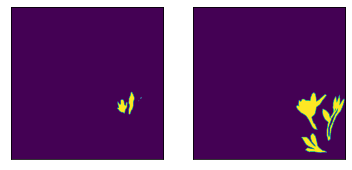

0.08638220035084863 0.09217312186956406 tensor(0.1692, device='cuda:0')
Train loss 0.11669273674488068 tensor(0.3418, device='cuda:0')
Train loss 0.09112635999917984 tensor(0.3273, device='cuda:0')
Train loss 0.06789560616016388 tensor(0.4241, device='cuda:0')


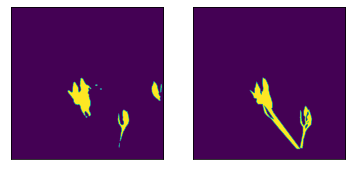

0.08614565750084273 0.07960407063364983 tensor(0.3932, device='cuda:0')
Train loss 0.11458872258663177 tensor(0.2206, device='cuda:0')
Train loss 0.09819052368402481 tensor(0.2671, device='cuda:0')
Train loss 0.10758538544178009 tensor(0.3580, device='cuda:0')


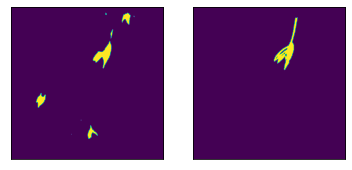

0.08401751109376186 0.0945617500692606 tensor(0.5363, device='cuda:0')
Train loss 0.060280609875917435 tensor(0.6078, device='cuda:0')
Train loss 0.08350645750761032 tensor(0.4548, device='cuda:0')
Train loss 0.08827788382768631 tensor(0.3330, device='cuda:0')


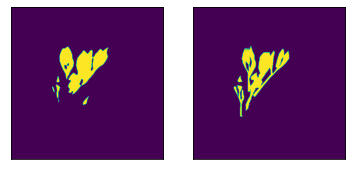

0.08109589475320607 0.0875050313770771 tensor(0.2500, device='cuda:0')
Train loss 0.07480354607105255 tensor(0.3913, device='cuda:0')
Train loss 0.06458176672458649 tensor(0.4120, device='cuda:0')
Train loss 0.06398320198059082 tensor(0.4853, device='cuda:0')


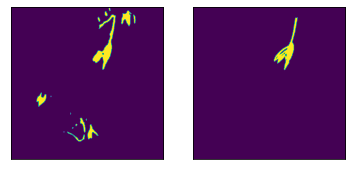

0.08619790424297495 0.10502091981470585 tensor(0.6174, device='cuda:0')
Train loss 0.08456467092037201 tensor(0.3658, device='cuda:0')
Train loss 0.09623844921588898 tensor(0.4038, device='cuda:0')
Train loss 0.09878496080636978 tensor(0.2483, device='cuda:0')


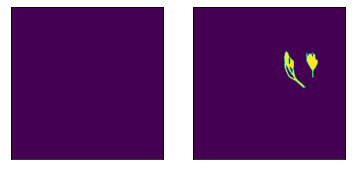

0.08124059765804105 0.08865299355238676 tensor(0.1834, device='cuda:0')
Train loss 0.0687127634882927 tensor(0.3504, device='cuda:0')
Train loss 0.09665518999099731 tensor(0.3968, device='cuda:0')
Train loss 0.059536922723054886 tensor(0.5235, device='cuda:0')


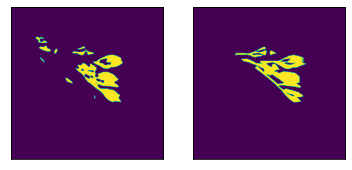

0.07903465883034032 0.08420984260737896 tensor(0.5701, device='cuda:0')
Train loss 0.09351420402526855 tensor(0.3643, device='cuda:0')
Train loss 0.07946021854877472 tensor(0.4472, device='cuda:0')
Train loss 0.0851457491517067 tensor(0.3689, device='cuda:0')


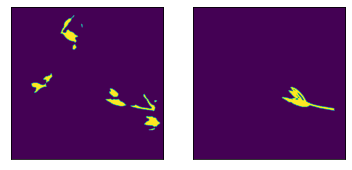

0.08810798106033628 0.08431917615234852 tensor(0.5876, device='cuda:0')
Train loss 0.05809325352311134 tensor(0.5196, device='cuda:0')
Train loss 0.10046109557151794 tensor(0.3803, device='cuda:0')
Train loss 0.10345388948917389 tensor(0.3004, device='cuda:0')


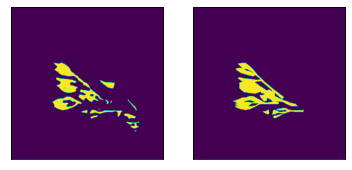

0.07975599823928461 0.08128469809889793 tensor(0.3144, device='cuda:0')
Train loss 0.10355087369680405 tensor(0.2770, device='cuda:0')
Train loss 0.09754318743944168 tensor(0.3997, device='cuda:0')
Train loss 0.06824920326471329 tensor(0.4885, device='cuda:0')


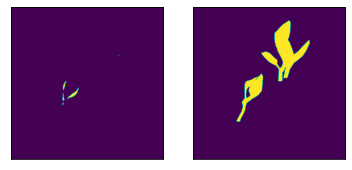

0.07809165083780521 0.09849587082862854 tensor(0.1446, device='cuda:0')
Train loss 0.11631526798009872 tensor(0.2914, device='cuda:0')
Train loss 0.09110597521066666 tensor(0.3927, device='cuda:0')
Train loss 0.08990655839443207 tensor(0.4575, device='cuda:0')


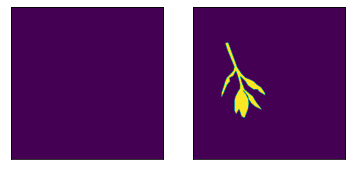

0.0813146166321708 0.08084872085601091 tensor(0.5227, device='cuda:0')
Train loss 0.06334313750267029 tensor(0.5128, device='cuda:0')
Train loss 0.08998695015907288 tensor(0.4814, device='cuda:0')
Train loss 0.06161029636859894 tensor(0.4584, device='cuda:0')


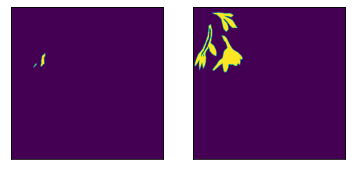

0.0790335695009406 0.07958891056478024 tensor(0.3873, device='cuda:0')
Train loss 0.11755342781543732 tensor(0.3849, device='cuda:0')
Train loss 0.06589173525571823 tensor(0.6573, device='cuda:0')
Train loss 0.08311935514211655 tensor(0.2816, device='cuda:0')


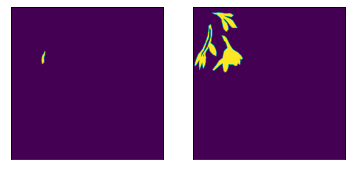

0.07663912080773493 0.08307069540023804 tensor(0.2780, device='cuda:0')
Train loss 0.060304995626211166 tensor(0.3941, device='cuda:0')
Train loss 0.056863319128751755 tensor(0.6182, device='cuda:0')
Train loss 0.0886233001947403 tensor(0.3202, device='cuda:0')


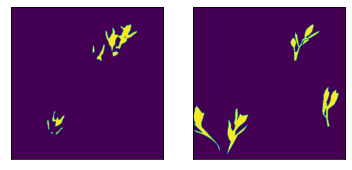

0.07742225478698568 0.10550398752093315 tensor(0.1384, device='cuda:0')
Train loss 0.05067387968301773 tensor(0.5600, device='cuda:0')
Train loss 0.08530069142580032 tensor(0.5501, device='cuda:0')
Train loss 0.07659511268138885 tensor(0.3416, device='cuda:0')


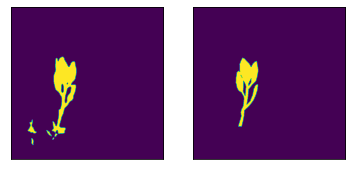

0.07699353611323892 0.07694325689226389 tensor(0.4285, device='cuda:0')


In [21]:
for _  in range(25):
    train_loss = train(train_loader, model, criterion, optimizer)
    val_loss, val_iou = validate(val_loader, model, criterion)
    
    print(train_loss, val_loss, val_iou)

In [23]:
test_dataset = XunFeiDataset(
    test_jpg[:], [train_json[0]] * len(test_jpg),
    A.Compose([
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
]))

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=5, shuffle=False, num_workers=1, pin_memory=False
)

model.eval()
test_pred = []
with torch.no_grad():
    for i, (input, target) in enumerate(test_loader):
        input = input.cuda()
        target = target.cuda()

        # compute output
        output = model(input)
        output = output.data.cpu().numpy()
        
        output = (output[:, 0, :, :] > 0).astype(int)
        test_pred.append(output)

In [24]:
!mkdir submit

In [25]:
test_pred = np.vstack(test_pred)
import os
for path, pred in zip(test_jpg, test_pred):
    cv2.imwrite(
        os.path.join('submit', os.path.basename(path).replace('.jpg', '.png')),
        pred.astype(np.uint8)
    )

In [26]:
!\rm submit.zip
!zip -r submit.zip submit

  adding: submit/ (stored 0%)
  adding: submit/shoot547_5.png (deflated 27%)
  adding: submit/shoot364_5.png (deflated 27%)
  adding: submit/shoot323_5.png (deflated 25%)
  adding: submit/shoot600_5.png (deflated 41%)
  adding: submit/shoot525_9.png (deflated 25%)
  adding: submit/shoot457_5.png (deflated 48%)
  adding: submit/shoot127_1.png (deflated 50%)
  adding: submit/shoot433_6.png (deflated 37%)
  adding: submit/shoot527_5.png (deflated 33%)
  adding: submit/shoot500_6.png (deflated 36%)
  adding: submit/shoot328_6.png (deflated 28%)
  adding: submit/shoot23_1.png (deflated 19%)
  adding: submit/shoot513_5.png (deflated 32%)
  adding: submit/shoot570_3.png (deflated 47%)
  adding: submit/shoot343_5.png (deflated 28%)
  adding: submit/shoot634_5.png (deflated 29%)
  adding: submit/shoot296_5.png (deflated 30%)
  adding: submit/shoot466_5.png (deflated 52%)
  adding: submit/shoot505_5.png (deflated 15%)
  adding: submit/shoot433_9.png (deflated 39%)
  adding: submit/shoot473_5.png